<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5"> TAF MCE - 2019</span></p>
<p><font size="4">  UE Numerical Methods </font></p>
<p></p>
<p><font size="5">  Notebook 03: Julia lab - constrained optimization </font></p>
</p></br>
</p>
</CENTER>

---------------------------

# <span style="color:#00B8DE">Constrained optimization</span>


Let us consider the following optimization problems

$$
(I) \left\{
\begin{array}{l}
\min_{x,y}(1-x)^2+100(y-x^2)^2\\
3x+y\ = 1
\end{array}
\right.
$$

and

$$
(II)\left\{
\begin{array}{l}
\min_{x,y}(1-x)^2+100(y-x^2)^2\\
(x+1)^2+(y-3)^2 \leq 1
\end{array}
\right.
$$

**1)** Plot the objective function and the constraints for both problems. 

**2)** Solve (I) with a Newton linearly constrained approach

**3)** Solve (II) with an interior point approach.


## <span style="color:#00B8DE">I - Objective and constraints plot

In [1]:
# Figure

using Pkg
Pkg.add("PyPlot")
Pkg.add("CalculusWithJulia")
using PyPlot
using Plots

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


In [2]:
f(x,y) = (1-x)^2+100*(y-x^2)^2
h1(x,y) = 3*x+y-1
h2(x,y) = (x+1)^2 + (y-3)^2 -1

x = range(-4, stop=4, length=500)
X = repeat(x', 500, 1)

y = range(-4, stop=10, length=500) 
Y = repeat(y, 1, 500)

F = f.(X,Y)
H2 = h2.(X, Y)

fig1 = Plots.contourf(X, Y, F, nlevels = 1000, c =:dense)
contour!(x,y, F, nlevels = 500)
#contour!(x,y,h1, nlevels = 0)
plot!([1,-2],[2,-5])

Arrays have incorrect length or dimension.


Arrays have incorrect length or dimension.


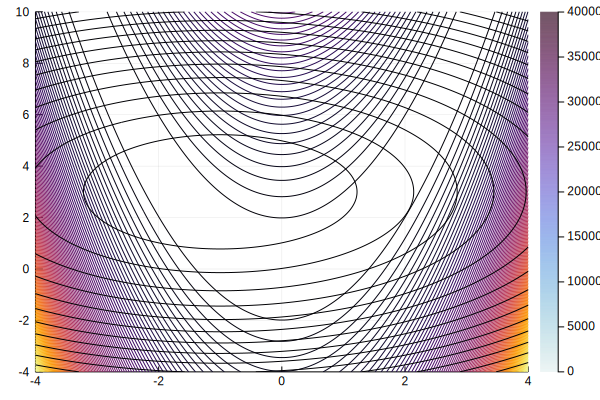

┌ Warning: Multiple series with different levels share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /homes/n17zan/.julia/packages/Plots/Iuc9S/src/backends/gr.jl:483


In [3]:
fig2 = Plots.contourf(X, Y, F, nlevels = 1000, c =:dense)
contour!(x, y, F, nlevels = 100)
contour!(x, y, H2, nlevels = 0)

## <span style="color:#00B8DE">II - Linearly constrained Newton

In [4]:
f(x,y)   = (1-x)^2+100*(y-x^2)^2
∇f(x,y)  = [-2*(1-x)-400*x*(y-x^2); 200*(y-x^2)]
∇2f(x,y) = [[2-400*y+1200*x^2 -400*x];[-400*x 200]]

h(x,y)  = 3*x+y-1
∇h      = [3; 1]

2-element Array{Int64,1}:
 3
 1

In [5]:
# Backtracking
#-------------
function backtracking(x,f,∇f,d)
    """
    bactracking: 
    see e.g. https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf - p.464
    IN:
    ---
    x: initial point
    f, ∇f: function to be minimized and its gradient
    d: searc direction
    OUT:
    ----
    y: final point
    n: number of loops
    """
    # α,β = 0.25, 0.7  backtracking parameters
    t = 1
    alpha = 0.25
    beta = 0.7
    n = 0
    
    gradient = ∇f(x[1],x[2])
    while(f(x[1]+t*d[1],x[2]+t*d[2]) >f(x[1],x[2])+(alpha*t)*(transpose(gradient)*d))
        t=beta*t
        n+=1
    end
    x = x + t*d
    #d=.-∇f(pt[1],pt[2])   
    
    
    return x,n
end

backtracking (generic function with 1 method)

In [6]:
prec        = 1.e-8
init        = [1,-2] #3,1
pt          = init
nb_iter_N   = 0  # number of loops
nb_loops_N  = 0  # number of inner loops count for backtracking
resu_N      = pt
A = [3 1]

while true
    v=(inv([[∇2f(pt[1], pt[2]) transpose(A)];[A 0]])*[-∇f(pt[1],pt[2]); 0])
    d = v[1:2]
    #if (-∇'*d)/2 < prec  # ∇f(x+td)_{t=0}= ∇'*d
    
    #if (transpose(d)*∇2f(pt[1],pt[2])*d)/2 < prec
    pt,innerLoop=backtracking(pt,f,∇f,d)
    nb_loops_N+=innerLoop
    nb_iter_N+=1
    resu_N      = [resu_N pt]
    if (-transpose(∇f(pt[1],pt[2]))*d)/2 < prec
        break
    end
    
end

In [7]:
println("Number of iterations for constrained Newton = $nb_iter_N")
println("Number of inner loops for constrained Newton = $nb_loops_N")

Number of iterations for constrained Newton = 5
Number of inner loops for constrained Newton = 0


In [8]:
print(pt)

[0.30331131332739436, 0.09006606001781725]

## <span style="color:#00B8DE">III - Interior point method

In [9]:
#t = 10
f(x,y)   =t*((1-x)^2+100*(y-x^2)^2) - log(1-((x+1)^2+(y-3)^2))
#denom = 2-(x+1)^2-(y-3)^2
∇f(x,y)  = [t*(-2+2*x-400*y*x+400*x^3)+2*(x+1)/(1-(x+1)^2-(y-3)^2); t*(200*y - 200*x^2)+2*(y-3)/(1-(x+1)^2-(y-3)^2)]

∇f (generic function with 1 method)

In [10]:
# Backtracking
#-------------
function backtracking_IPM(x,f,∇f,d)
    """
    bactracking: 
    see e.g. https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf - p.464
    IN:
    ---
    x: initial point
    f, ∇f: function to be minimized and its gradient
    d: searc direction
    OUT:
    ----
    y: final point
    n: number of loops
    """
    # α,β = 0.25, 0.7  backtracking parameters
    t = 0.01
    alpha = 0.25
    beta = 0.7
    n = 0
    
    gradient = ∇f(x[1],x[2])
    while(f(x[1]+t*d[1],x[2]+t*d[2]) >f(x[1],x[2])+(alpha*t)*(transpose(gradient)*d))
        t=beta*t
        n+=1
    end
    x = x + t*d
    #d=.-∇f(pt[1],pt[2])   
    
    
    return x,n
end

backtracking_IPM (generic function with 1 method)

In [11]:
using LinearAlgebra: norm, eigen

prec        = 1.e-12
init        = [-1,3]  # center of the circle
pt          = init
nb_iter_IP  = 0  # number of loops
nb_loops_IP = 0  # number of inner loops count for backtracking
resu_IP     = pt
alpha =1.5
m =1
t =10

while true
    nb_iter_IP += 1 
    gradient = ∇f(pt[1], pt[2])
    while true
        a=pt- 0.05*gradient
       if (((a[1]+1)^2+(a[2]-3)^2)<=1)
            break
       end
        gradient/=2
    end
    
    pt, innerLoop = backtracking_IPM(pt,f,∇f,-gradient)
    nb_loops_IP+=innerLoop
    resu_IP = [resu_IP pt]
    t = alpha*t 
    if(m/t<prec)
        break
    end
    
end

In [12]:
println("Number of iterations for Interior point = $nb_iter_IP")
println("Number of inner loops for  Interior point = $nb_loops_IP")

Number of iterations for Interior point = 63
Number of inner loops for  Interior point = 583


In [13]:
print(pt)

[-1.6301458469967527, 2.6631110686393153]